The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


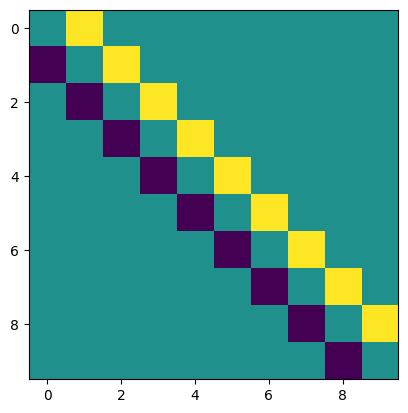

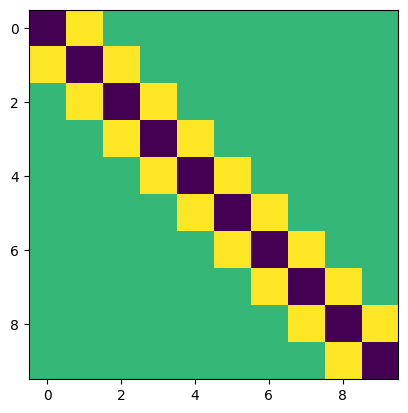

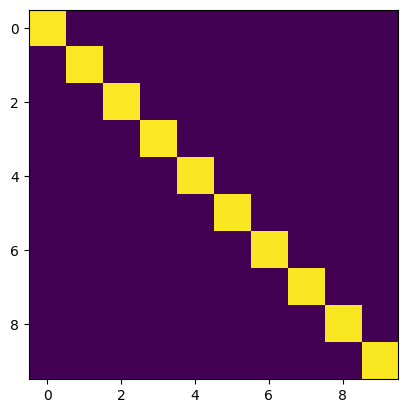

In [53]:
%load_ext autoreload
%autoreload all
from HammiltonSolver_funcs import *
from matplotlib import pyplot as plt

potFunc = potFunc_transmon_test

xmax = 20
fid = 0.1
vecLen = int(2*xmax/fid)

#diff opp
#-1 1
#0 0

d = get_diffop(xmax, fid)
dd = get_ddop(xmax, fid)

#matrixdisplay
plt.imshow(d.real[:10, :10])
plt.show()

#display second derivative
plt.imshow(dd.real[:10, :10])
plt.show()

#potopp
pot = get_potop(xmax, fid, potFunc)

#matrixdisplay
plt.imshow(pot.real[:10, :10])
plt.show()


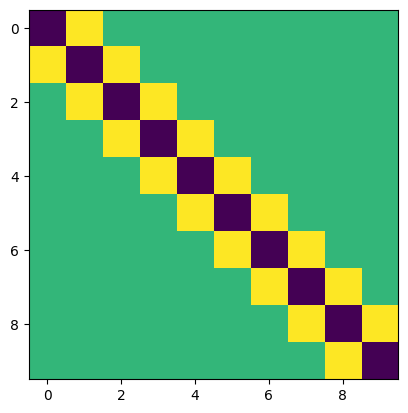

KeyboardInterrupt: 

In [54]:
#find eigenvalues
hamiltonian = get_hamiltonian(xmax, fid, potFunc)

plt.imshow(hamiltonian.real[:10, :10])
plt.show()

eigenvalues, eigenvectors, basisTransform = solveEi(hamiltonian)




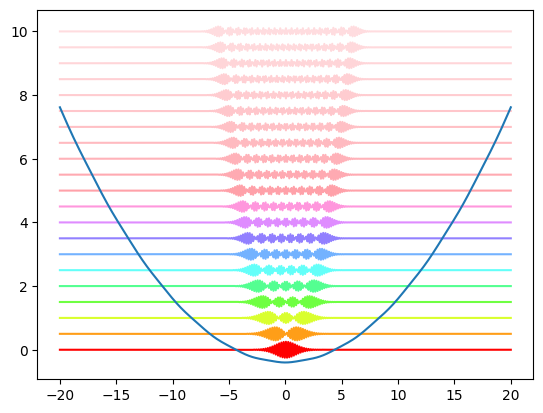

'cnt = 0\nfor i in range(len(negEigenvalues)):\n    plt.plot(X, negEigenvectors[:,i].real, color=cmap((i*1e-1)%1),alpha=np.exp(-cnt*1e-2-0.2),zorder=1000-cnt)\n    cnt += 1\n    if cnt > 1000: break\nplt.ylim(-0.2,0.2)\nplt.show()'

In [ ]:
#plot eigenvecs
import numpy as np
X = np.linspace(-xmax, xmax, vecLen)
plt.plot(X, potFunc(X)*2e-2-0.4, zorder=101)
#plt.plot(X, eigenvectors[:,0].real, color='red')
cnt = 0
#make cmap for differentiating the plots
cmap = plt.get_cmap('hsv')
for i in range(len(eigenvalues)):
    plt.plot(X, eigenvectors[:,i].real+i/2, color=cmap(i*1e-1),alpha=np.exp(-cnt*1e-1),zorder=100-cnt)
    cnt += 1
    if cnt > 20: break
plt.show()
#plot neg eigenvecs
#plt.plot(X, potFunc(X)*1e-3, zorder=1001)
#plt.plot(X, negEigenvectors[:,0].real, color='red')
"""cnt = 0
for i in range(len(negEigenvalues)):
    plt.plot(X, negEigenvectors[:,i].real, color=cmap((i*1e-1)%1),alpha=np.exp(-cnt*1e-2-0.2),zorder=1000-cnt)
    cnt += 1
    if cnt > 1000: break
plt.ylim(-0.2,0.2)
plt.show()"""

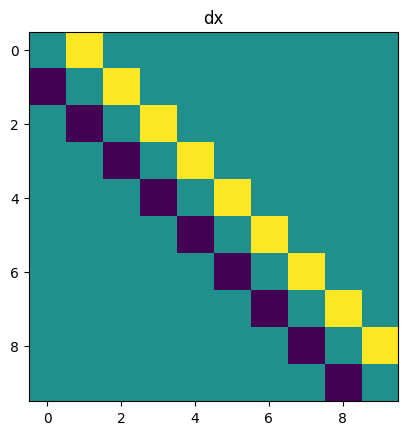

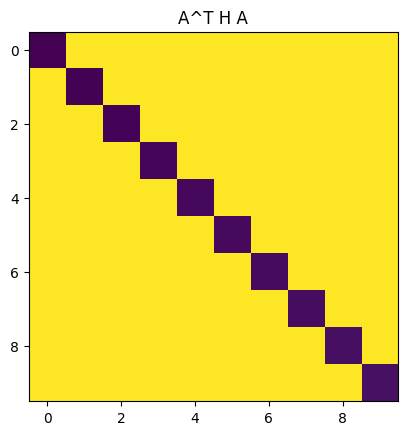

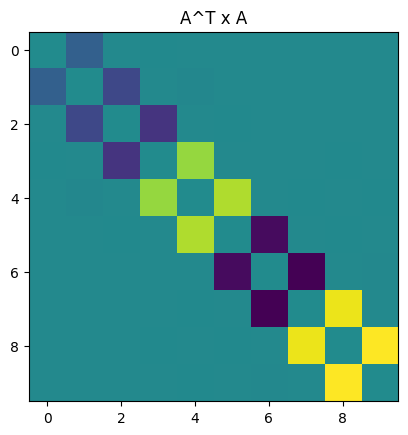

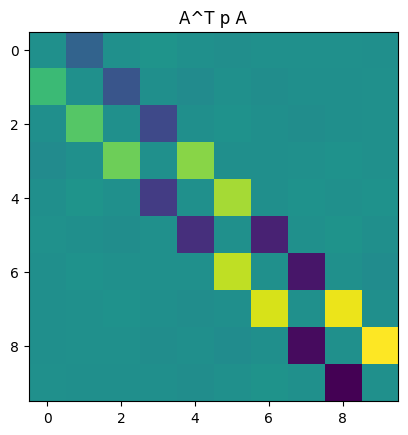

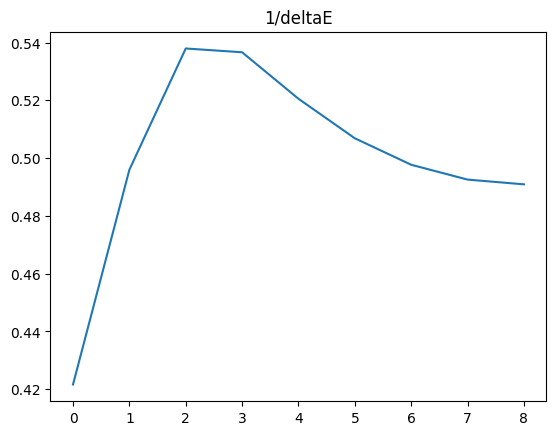

In [ ]:
hDiag = np.dot(np.dot(basisTransform.T, hamiltonian), basisTransform)
x = np.diag(np.linspace(-xmax, xmax, vecLen))
xDiag = np.dot(np.dot(basisTransform.T, x), basisTransform)
p = -np.copy(d)*1j
pDiag = np.dot(np.dot(basisTransform.T, p), basisTransform)

plt.imshow(d.real[:10, :10])
plt.title('dx')
plt.show()

plt.imshow(hDiag.real[:10, :10])
plt.title('A^T H A')
plt.show()

plt.imshow(xDiag.real[:10, :10])
plt.title('A^T x A')
plt.show()

plt.imshow(pDiag.imag[:10, :10])
plt.title('A^T p A')
plt.show()

#compute delta energies and plot them
energies = [hDiag[i,i] for i in range(len(eigenvalues))]
deltaE = np.diff(energies)
plt.plot((deltaE**-1)[:10])
plt.title('1/deltaE')
plt.show()

#export the diagonalized hamiltonian
np.save('HDiag_transmon.npy', hDiag)

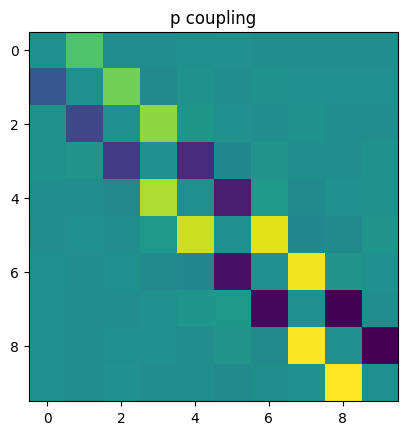

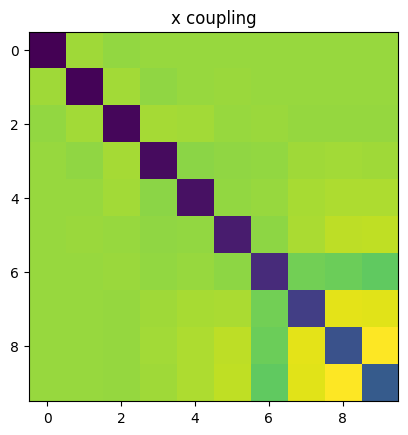

In [ ]:
#calculating transfer coefficients

#1 limit the scope to a basis of 10
#2 given a parameter q (pseudo charge), compute the coupling coefficients by inner producting over both x and p opperators
#3 given some field strength of the pertubation, add this
#4 display the coupling matricies

#1
basis = 10
eigenvalues = eigenvalues[:basis].astype(np.complex128)
eigenvectors = eigenvectors[:,:basis].astype(np.complex128)
basisTransform = basisTransform[:,:basis].astype(np.complex128)

#2
q = 1
coupling_p = np.zeros((basis, basis), dtype=np.complex128)
for i in range(basis):
    for j in range(basis):
        coupling_p[i,j] = np.dot(np.conjugate(eigenvectors[:,i].T),np.dot(pDiag, eigenvectors[:,j]))*q

coupling_x = np.zeros((basis, basis), dtype=np.complex128)
for i in range(basis):
    for j in range(basis):
        coupling_x[i,j] = np.dot(np.conjugate(eigenvectors[:,i].T),np.dot(xDiag, eigenvectors[:,j]))*q

#3
field = 1
coupling_p *= field
coupling_x *= field

#4
plt.imshow(coupling_p.imag)
plt.title('p coupling')
plt.show()
#save coupling_p
np.save('coupling_p_test.npy', coupling_p)

plt.imshow(coupling_x.real)
plt.title('x coupling')
plt.show()
#save coupling_x
np.save('coupling_x_test.npy', coupling_x)
